In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits

data_fontaine = pd.read_csv('/home/fmq/blog_git/blog/MESA/observe_data/fontaine2012/asteroseismology_26.txt', header=0, sep=',')


In [3]:
print(data_fontaine.columns)
print(data_fontaine)

Index(['rawid', 'identifier', 'typ', 'coord1(ICRS,J2000/2000)', 'MagU', 'MagB',
       'MagV', 'MagR', 'MagI', 'spec.type', 'logg', 'logg-err', 'Teff',
       'Teff-err', 'mass', 'mass-err', 'loghe', 'loghe-err'],
      dtype='object')
               rawid              identifier  typ  \
0         PG0014+067              PG0014+068  HS*   
1         PG0048+092              PG0048+091  HS*   
2       EC05217-3914            EC05217-3914  HS*   
3         PG0911+456                 V*DTLyn  HS*   
4       EC09582-1137              PG0958-116  HS*   
5         PG1047+003                 V*UYSex  HS*   
6         PG1325+101              PG1325+102  HS*   
7         PG1336-018                 V*NYVir  HS*   
8         PG1605+072              PG1605+072  HS*   
9       KPD1943+4058               Kepler-70  HS*   
10      KPD0629-0016            KPD0629-0016  HS*   
11        PG1219+534              PG1219+534  HS*   
12       KIC02697388  2MASSJ19090714+3756143  HS*   
13      EC20117-4014  

In [4]:
star_name = data_fontaine['rawid']
# print(data_fontaine['Teff'])
log_Teff = np.log10(data_fontaine['Teff'])

log_Teff_err = np.log10(1+data_fontaine['Teff-err']/data_fontaine['Teff'])
log_g = data_fontaine['logg']
log_g_err = data_fontaine['logg-err']
log_he = data_fontaine['loghe']
log_he_err = data_fontaine['loghe-err']

mass_true = data_fontaine['mass']
import pandas as pd

new_data = pd.DataFrame({
    'star_name': star_name,
    'log_Teff': log_Teff,
    'log_Teff_err': log_Teff_err,
    'log_g': log_g,
    'log_g_err': log_g_err,
    'log_he': log_he,
    'log_he_err': log_he_err,
    'mass_true': mass_true
})

print(new_data)
data_dict = new_data.to_dict(orient='records')
# print(data_dict)

           star_name  log_Teff  log_Teff_err  log_g  log_g_err  log_he  \
0         PG0014+067  4.533136      0.004683  5.772      0.008   -1.68   
1         PG0048+092  4.522444      0.002211  5.711      0.010   -3.00   
2       EC05217-3914  4.505150      0.023767  5.730      0.008   -3.00   
3         PG0911+456  4.504335      0.002981  5.777      0.002   -2.55   
4       EC09582-1137  4.541642      0.002860  5.788      0.004   -1.68   
5         PG1047+003  4.520484      0.002612  5.800      0.006   -1.99   
6         PG1325+101  4.544688      0.002717  5.811      0.004   -1.65   
7         PG1336-018  4.515609      0.002642  5.739      0.002   -2.94   
8         PG1605+072  4.509203      0.004015  5.226      0.004   -2.73   
9       KPD1943+4058  4.442950      0.004208  5.520      0.030   -2.71   
10      KPD0629-0016  4.423000      0.003186  5.450      0.034     NaN   
11        PG1219+534  4.526339      0.004756  5.807      0.006     NaN   
12       KIC02697388  4.404748      0.

In [5]:
data_dict = data_fontaine.to_dict(orient='records')

/tmp/ipykernel_22567/1123674278.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


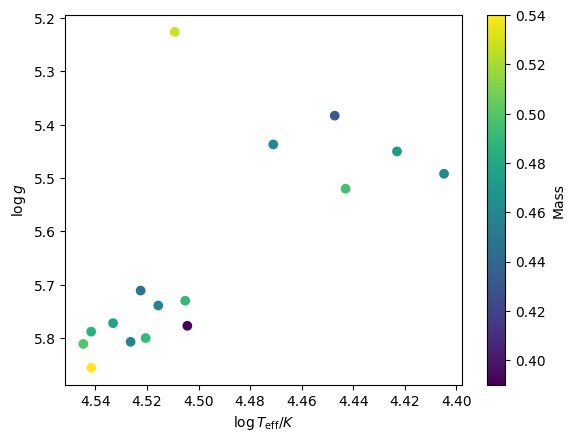

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()



# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
# log_g = data_result_lei['log_g']
# log_Teff = data_result_lei['log_Teff']
sc = plt.scatter(log_Teff, log_g, c=mass_true, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Mass')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()